https://towardsdatascience.com/bayesian-inference-intuition-and-example-148fd8fb95d6

In [103]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
from matplotlib import pyplot as plt

In [325]:
class Environment():
    
    def __init__(self):
        self.prob_success = 0.7
        self.num_experiments = 10
        
    def sample(self):
        return np.array([stats.bernoulli.rvs(self.prob_success) for _ in range(self.num_experiments)])
    
    def get_historical_distribution(self, num_samples=10000):
        sample_probs = []
        for i in range(num_samples):
            sample = self.sample()
            sample_prob = sample.mean()
            sample_probs.append(sample_prob)
        return np.array(sample_probs)
        #return np.random.binomial(n=self.num_experiments, p=p_rain_true, size=sample_size)

In [326]:
environment = Environment()

In [327]:
historical_data = environment.get_historical_distribution()

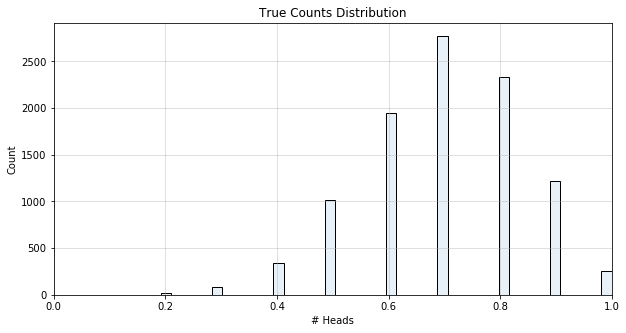

In [328]:
fig, ax = plt.subplots(1, figsize=(10,5))
g = sns.histplot(historical_data, ax=ax, alpha=0.1)
plt.grid(alpha=0.5)
plt.title('True Counts Distribution')
plt.xlabel('# Heads');
g.set(xlim=(0, 1));

In [345]:
observations_prior = environment.sample()
observations_prior

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1])

# MLE

In [346]:
# Our best guess (MLE) is a simple average of our observations:
observations_prior.mean()

0.5

# MAP

In [347]:
# warm up cycle (e.g. historical data = belief)
num_successes = (observations_prior == 1).sum()
num_failures = (observations_prior == 0).sum()

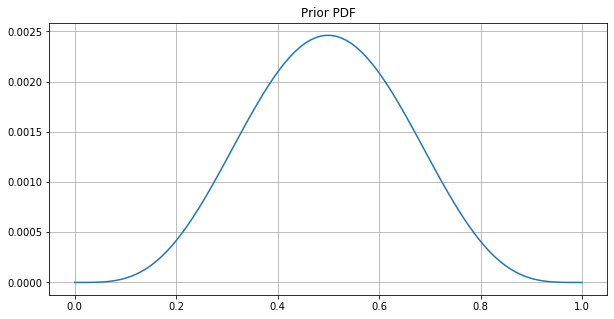

In [348]:
x_range = np.linspace(0,1,100)
x_range_e = x_range + 0.001 

prior = stats.beta.cdf(x=x_range_e, a=num_successes, b=num_failures) -\
        stats.beta.cdf(x=x_range,   a=num_successes, b=num_failures) 

fig, ax = plt.subplots(1, figsize=(10,5))
g2 = sns.lineplot(x=x_range, y=prior)
plt.title('Prior PDF')
plt.grid()

In [349]:
p = num_successes / (num_successes + num_failures)

prior = stats.beta.pdf(x=x_range, a=num_successes, b=num_failures)

likelihood = stats.binom.pmf(k=num_successes, 
                             n=num_successes+num_failures, 
                             p=x_range)

In [350]:
posterior_raw = likelihood * prior
posterior_normalized = posterior_raw / posterior_raw.sum()

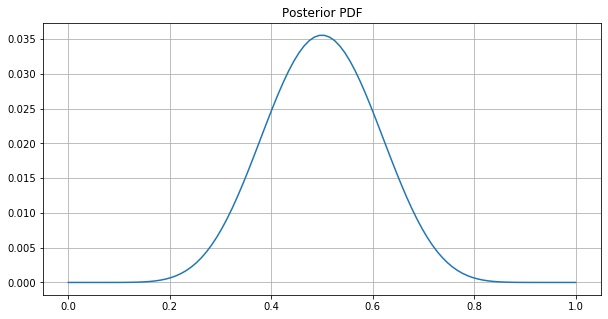

In [351]:
fig, ax = plt.subplots(1, figsize=(10,5))
sns.lineplot(x=x_range, y=posterior_normalized)
plt.title('Posterior PDF')
plt.grid();

In [353]:
# Iterate many times

def update_posterior(prior, i):
    # Gather observations
    observations = environment.sample()
    num_successes = (observations == 1).sum()
    num_failures = (observations == 0).sum()

    # Calculate Likelihood
    likelihood = stats.binom.pmf(k=num_successes, 
                                 n=num_successes+num_failures, 
                                 p=x_range)

    # Update Posterior
    posterior_raw = likelihood * prior
    posterior_normalized = posterior_raw / posterior_raw.sum()
    prior = posterior_normalized

    fig, ax = plt.subplots(1, figsize=(10,5))
    sns.lineplot(x=x_range, y=posterior_normalized)
    plt.title(f'Posterior PDF: Iteration #{i}')
    plt.grid();
    
    return prior, i+1

i = 1

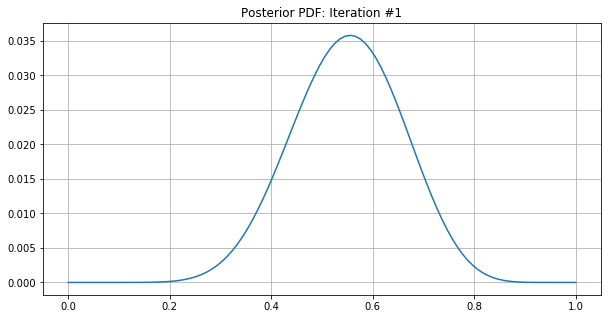

In [354]:
prior, i = update_posterior(prior, i)

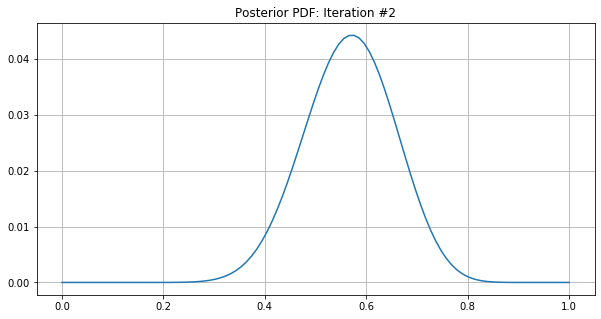

In [355]:
prior, i = update_posterior(prior, i)

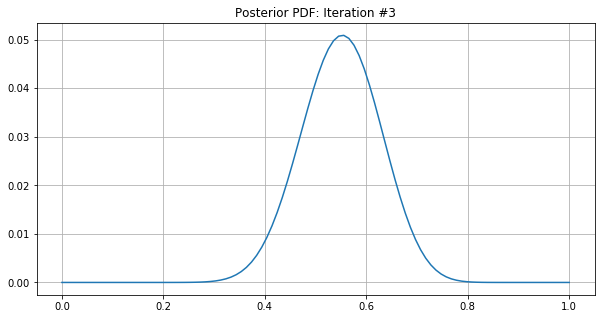

In [356]:
prior, i = update_posterior(prior, i)

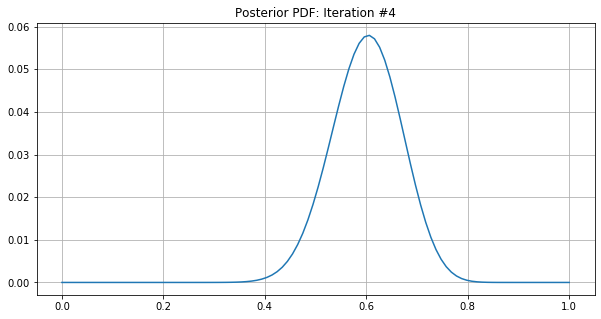

In [357]:
prior, i = update_posterior(prior, i)

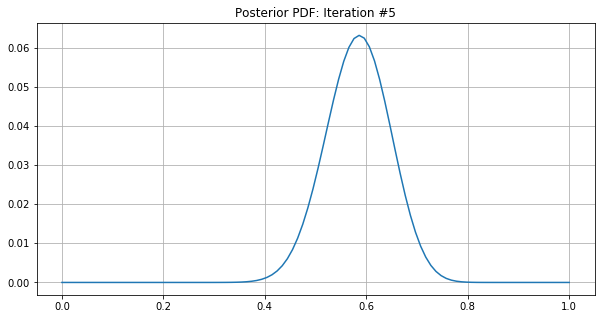

In [358]:
prior, i = update_posterior(prior, i)

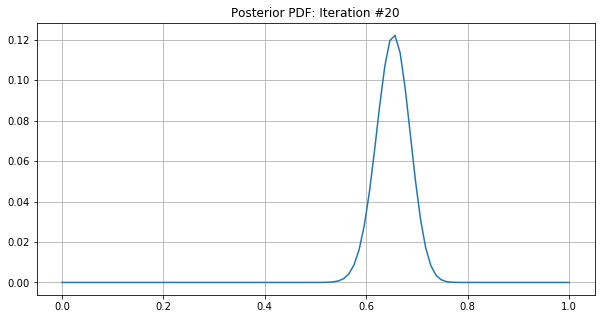

In [373]:
prior, i = update_posterior(prior, i)

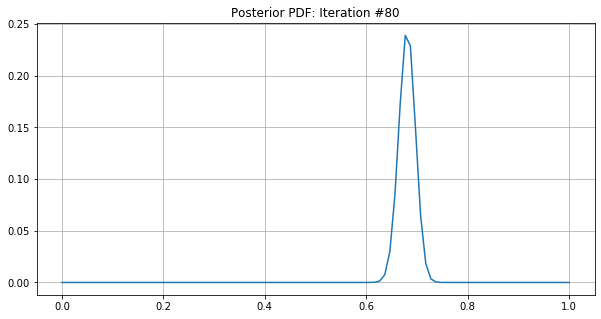

In [416]:
prior, i = update_posterior(prior, i)

# Conjugate

https://towardsdatascience.com/conjugate-prior-explained-75957dc80bfb

For some likelihood functions, if you choose a certain prior, the posterior ends up being in the same distribution as the prior. Such a prior then is called a **Conjugate Prior**.

When you know that your prior is a conjugate prior, you can skip the `posterior = likelihood * prior` computation. Furthermore, if your prior distribution has a closed-form form expression, you already know what the maximum posterior is going to be.

Coin toss is a **Bernoulli(p)** experiment. 

Multiple (n) Bernoulli(p) experiments can be modeled by the **Binomial(n,p)** distribution.

Thus, our sampling distribution is a Binomial with unknoun parameter p. 

Let's assume our prior belief is that the coin is fair. Thus, the prior distribution is a Beta(1, 1).

Beta distribution appears to be a conjugate prior to a Binomial likelihood.

In [486]:
# Initialization

observations = environment.sample()
print(f'observations: {observations}')
num_successes = (observations == 1).sum()
num_failures = (observations == 0).sum()

posterior = prior = stats.beta.pdf(x=x_range, a=num_successes, b=num_failures)

observations: [0 1 1 0 1 1 1 1 1 1]


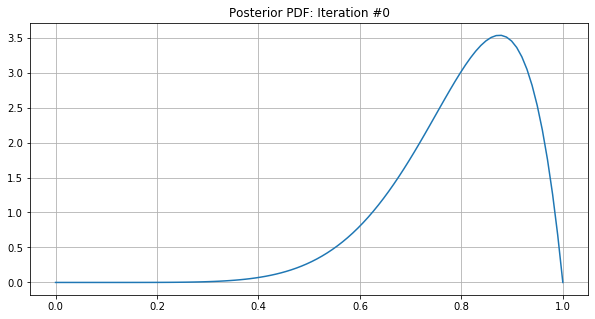

In [487]:
fig, ax = plt.subplots(1, figsize=(10,5))
sns.lineplot(x=x_range, y=posterior)
plt.title(f'Posterior PDF: Iteration #0')
plt.grid();

In [488]:
def update_conjugate(num_successes, num_failures, i):
    observations = environment.sample()
    num_successes += (observations == 1).sum()
    num_failures += (observations == 0).sum()

    posterior = stats.beta.pdf(x=x_range, a=num_successes, b=num_failures)
    
    fig, ax = plt.subplots(1, figsize=(10,5))
    sns.lineplot(x=x_range, y=posterior)
    plt.title(f'Posterior from Conjugate Prior: Iteration #{i}')
    plt.grid();
    
    return num_successes, num_failures, i+1

i = 1

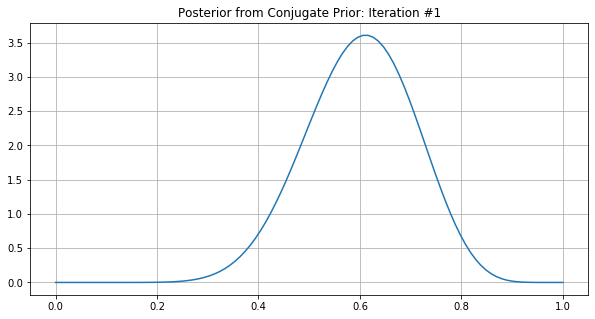

In [489]:
num_successes, num_failures, i = update_conjugate(num_successes, num_failures, i)

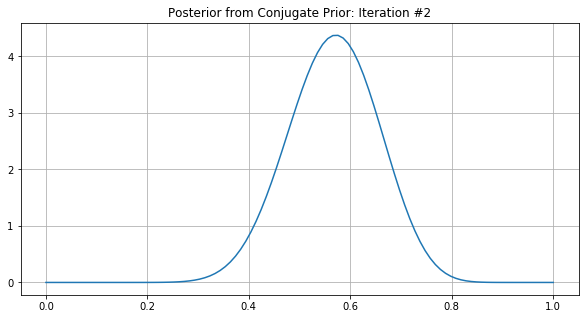

In [490]:
num_successes, num_failures, i = update_conjugate(num_successes, num_failures, i)

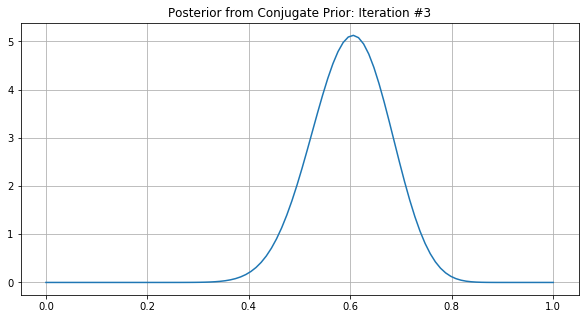

In [491]:
num_successes, num_failures, i = update_conjugate(num_successes, num_failures, i)

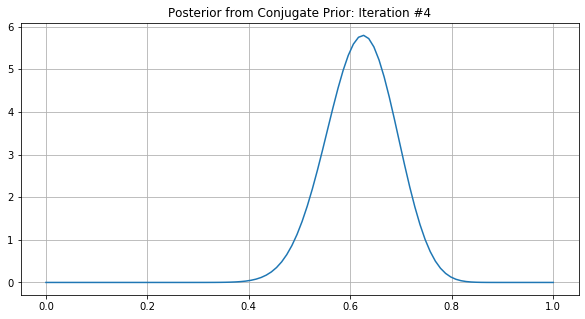

In [492]:
num_successes, num_failures, i = update_conjugate(num_successes, num_failures, i)

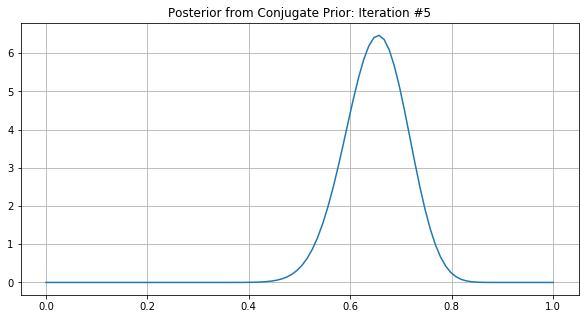

In [493]:
num_successes, num_failures, i = update_conjugate(num_successes, num_failures, i)

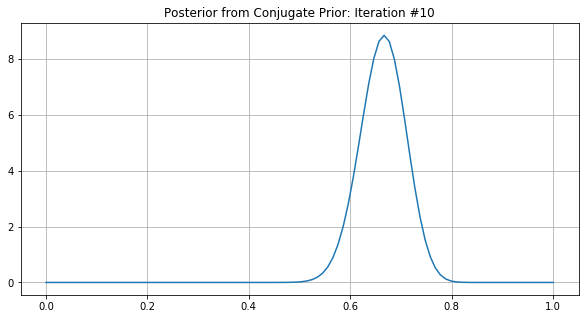

In [498]:
num_successes, num_failures, i = update_conjugate(num_successes, num_failures, i)

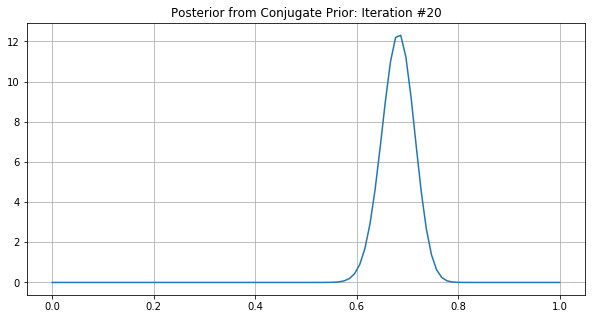

In [504]:
num_successes, num_failures, i = update_conjugate(num_successes, num_failures, i)

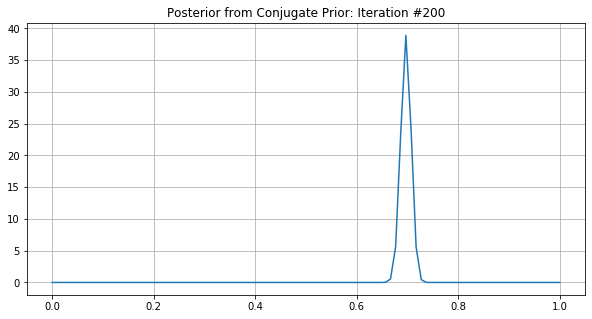

In [535]:
num_successes, num_failures, i = update_conjugate(num_successes, num_failures, i)

https://web.stanford.edu/class/archive/cs/cs109/cs109.1192/reader/11%20Parameter%20Estimation.pdf

In order to get ready for the world of MAP estimation, we are going to need to brush up on our distributions.
We will need reasonable distributions for each of our different parameters. For example, if you are predicting
a Poisson distribution, what is the right random variable type for the prior of λ?

A desiderata for prior distributions is that the resulting posterior distribution has the same functional form.
We call these “conjugate” priors. In the case where you are updating your belief many times, conjugate priors
makes programming in the math equations much easier.

| Parameter | Recommended Prior |
| --- | --- |
| Bernoulli p | Beta |
| Binomial p | Beta |
| Negative Binomial p | Beta |
| Geometric p | Beta |
| Poisson λ | Gamma |
| Exponential λ | Gamma |
| Multinomial p<sub>i</sub> | Dirichlet |
| Normal µ | Normal |
| Normal σ<sup>2<sup> | Inverse Gamma |